In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("House_Pricing.csv")
df.head(3)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062


## Dataset Overview

In [4]:
df.shape

(21613, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

- Numerical Columns: ID, Sale Price, No of Bedrooms, Basement Area (in Sqft), Flat Area (in Sqft), Lot Area (in Sqft)
- Categorical Columns: Date House was Sold, Waterfront View, No of Times Visited, and Condition of the House.

In [7]:
df.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Duplicate Removal

In [9]:
df.duplicated().sum()               #Checking for duplicate rows in the dataset

0

In [10]:
df.columns.duplicated().sum()        #Checking for duplicate columns in the dataset

0

## Handling Missing Values

In [12]:
df.isna().sum()

ID                                               0
Date House was Sold                              0
Sale Price                                       4
No of Bedrooms                                   0
No of Bathrooms                                  4
Flat Area (in Sqft)                              9
Lot Area (in Sqft)                               9
No of Floors                                     0
Waterfront View                                  0
No of Times Visited                          19489
Condition of the House                           0
Overall Grade                                    0
Area of the House from Basement (in Sqft)        3
Basement Area (in Sqft)                          0
Age of House (in Years)                          0
Renovated Year                                   0
Zipcode                                          1
Latitude                                         1
Longitude                                        1
Living Area after Renovation (i

In [13]:
df["No of Times Visited"].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [14]:
df.drop(["No of Times Visited","ID"],axis = 1, inplace =True)    # dropping column "No of Times Visited" and "ID"


In [15]:
df.head(3)

,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,Fair,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,Fair,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,Fair,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062


In [16]:
# splitting Numerical and Categorical Columns
num_df =df.select_dtypes(include="number") # numerical columns
cat_df =df.select_dtypes(include="object") # categorical columns

In [17]:
print ("Numerical columns are")
num_cols = num_df.columns.tolist()
print(num_cols)

Numerical columns are
['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [18]:
print ("Categorical columns are")
cat_cols = cat_df.columns.tolist()
print(cat_cols)

Categorical columns are
['Date House was Sold', 'Waterfront View', 'Condition of the House']


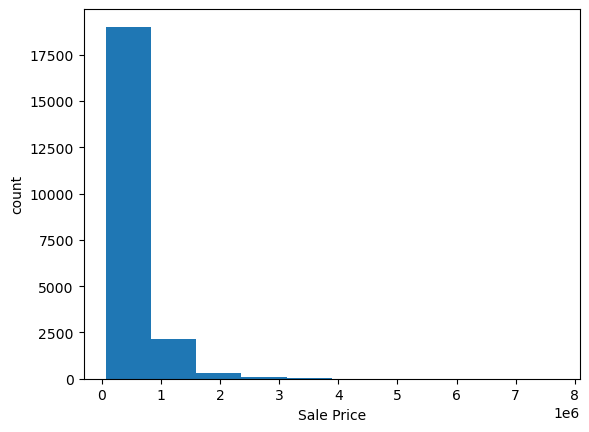

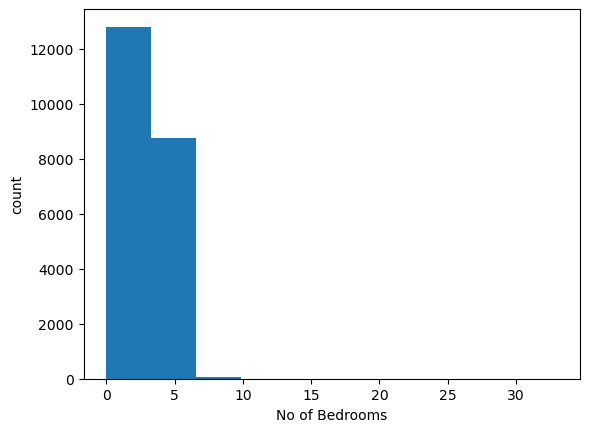

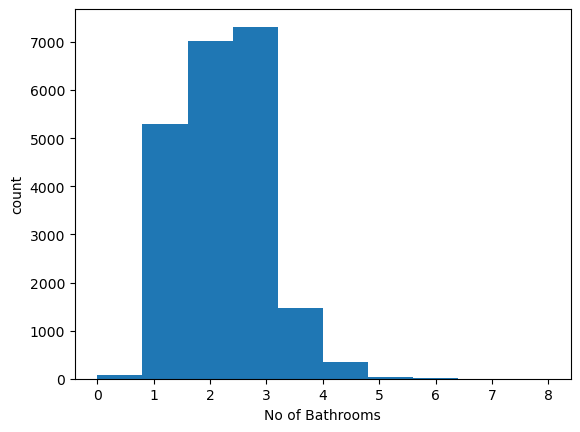

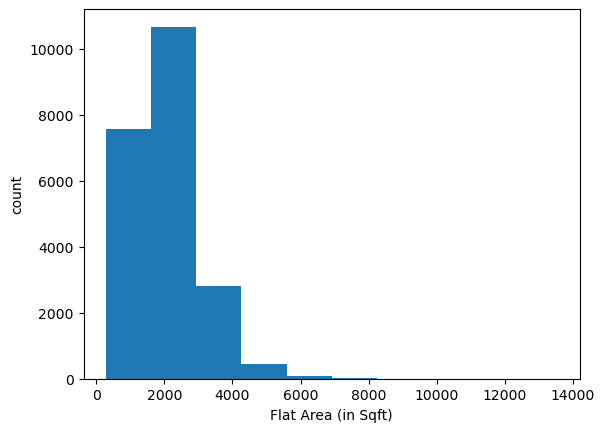

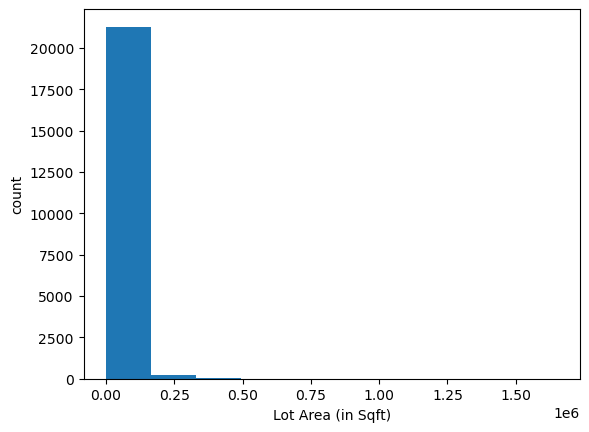

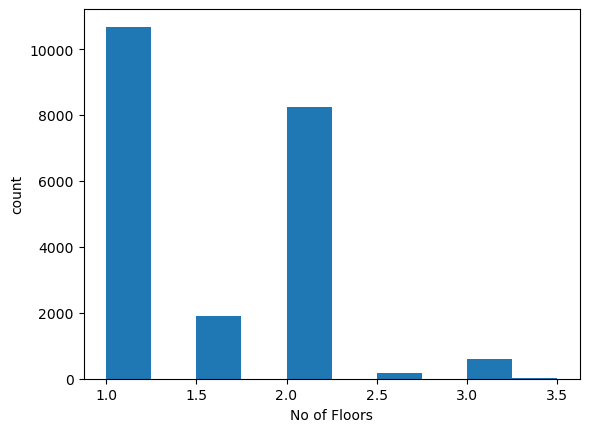

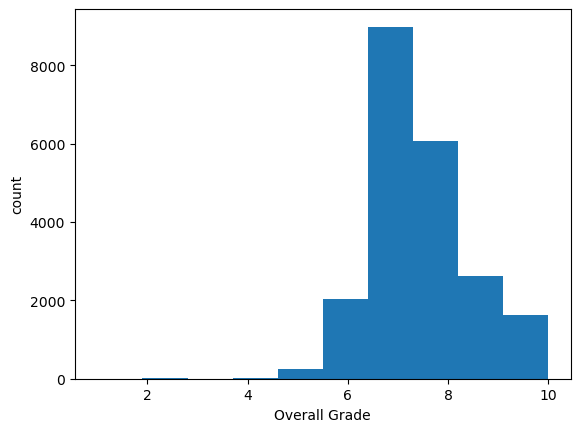

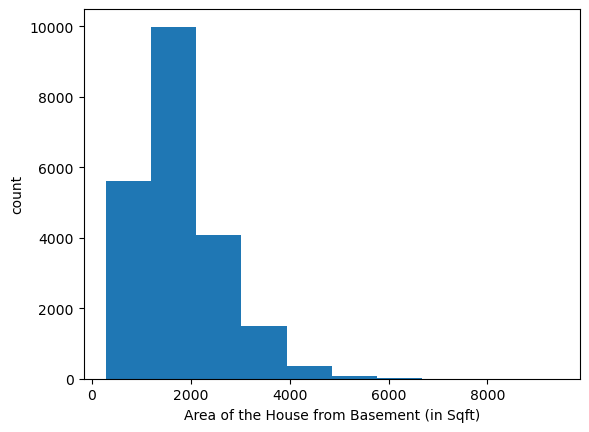

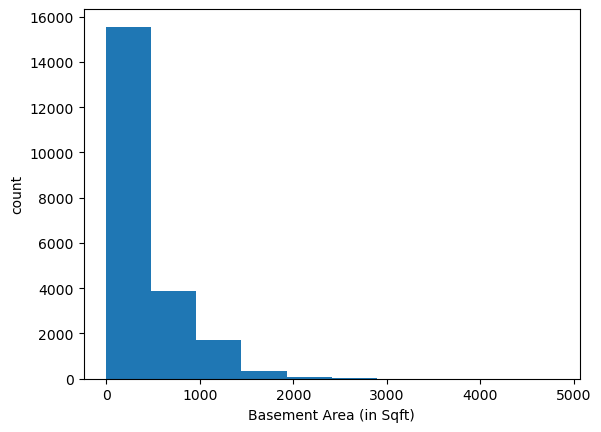

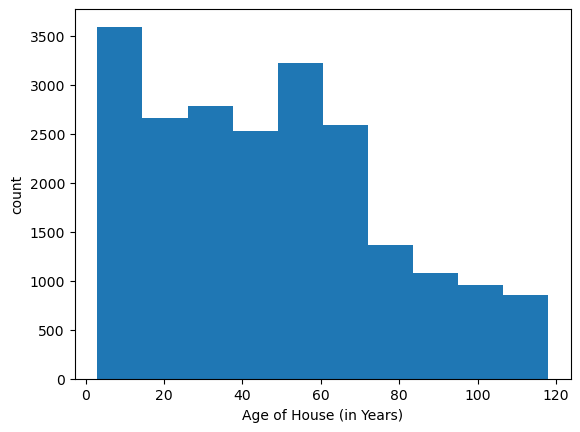

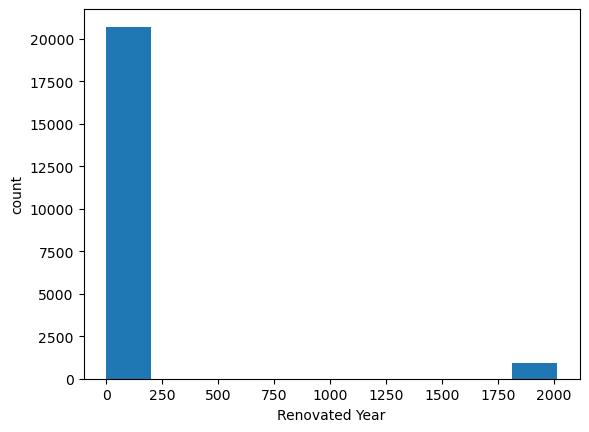

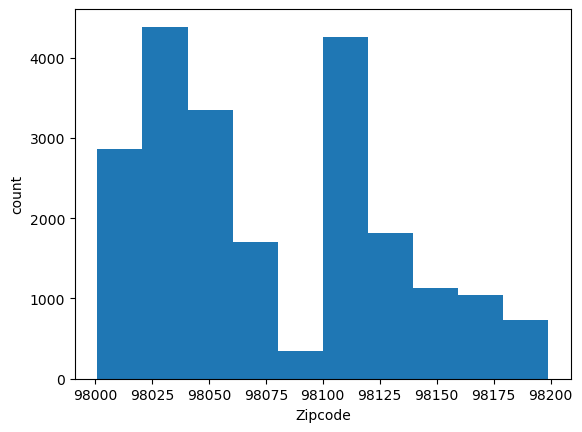

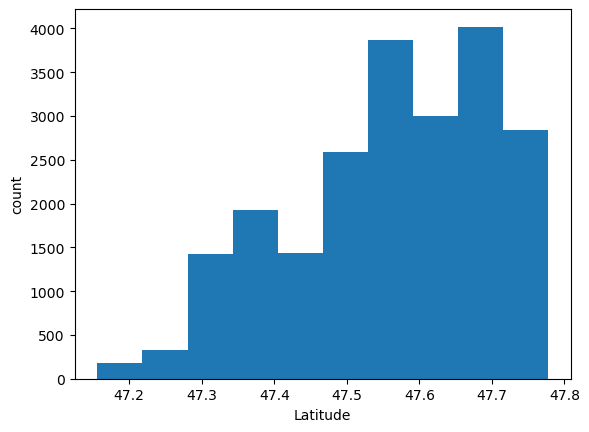

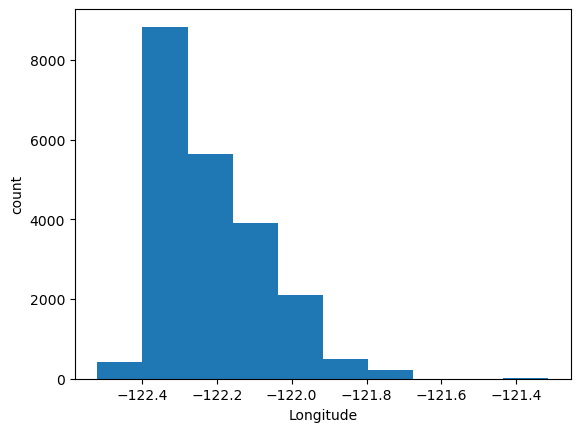

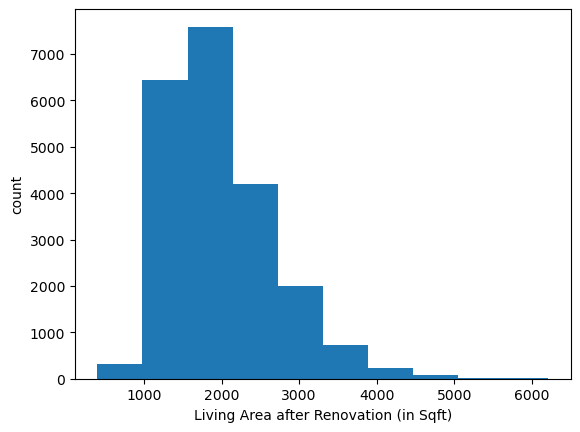

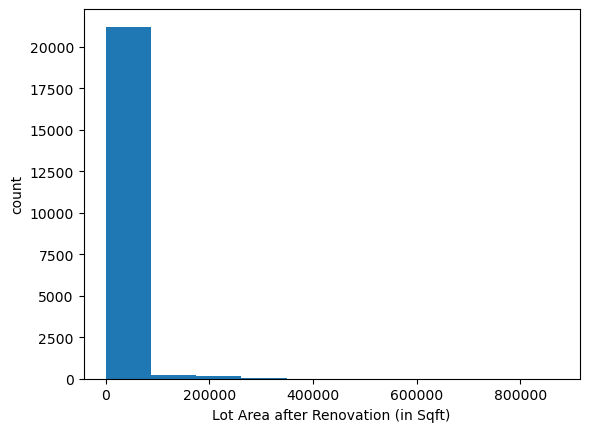

In [19]:
for col in num_cols:
    plt.hist(num_df[col])
    plt.xlabel(col)
    plt.ylabel("count")
    plt.show()


- Distribution of "Sale Price","Flat area","Lot Area","Area of the House from Basement (in Sqft)" is skewed , hence missing values can be replaced with median.

In [21]:
for col in num_cols:                 #Filling missing values for numerical columns
    num_df[col] = num_df[col].fillna(num_df[col].median())

In [22]:
num_df.isna().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [23]:
cat_df.isna().sum()     #There is no missing values in categorical columns

Date House was Sold       0
Waterfront View           0
Condition of the House    0
dtype: int64

In [24]:
df = pd.concat([num_df, cat_df], axis =1) # recombine both numerical and categorical variables
df.isna().sum()

Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      0
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
Date House was Sold                          0
Waterfront View                              0
Condition of the House                       0
dtype: int64

In [25]:
# Convert 'Date House was Sold' to datetime format
#df["Date House was Sold"] = pd.to_datetime(df["Date House was Sold"],inplace = True)

In [26]:
#df.dtypes

In [27]:
# Extract features from the date
#df['Year Sold'] = df['Date House was Sold'].dt.year
#df['Month Sold'] = df['Date House was Sold'].dt.month
#df['Day of Week Sold'] = df['Date House was Sold'].dt.dayofweek
#df.head(3)

In [28]:
df.drop(["Date House was Sold"],axis = 1, inplace =True)

## Encoding Categorical Variables

In [30]:
df.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,Fair
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No,Fair
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,Fair


In [31]:
df["Waterfront View"].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
df["Condition of the House"].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [33]:
Condition = ["Bad", "Okay", "Good","Fair","Excellent"]    # Ordinal Encoder
ordinal_enc = OrdinalEncoder(categories = [Condition])
df["condition_of_the_house_encoded"] = ordinal_enc.fit_transform(df[["Condition of the House"]])
df.head(3)


,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Waterfront View,Condition of the House,condition_of_the_house_encoded
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,No,Fair,3.0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,No,Fair,3.0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,No,Fair,3.0


In [34]:
df = pd.get_dummies(df, columns =["Waterfront View"], prefix= "col",dtype = int) #One hot Encoder


In [35]:
df.drop(["Condition of the House"],axis = 1, inplace =True)

In [36]:
df.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_of_the_house_encoded,col_No,col_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,3.0,1,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,3.0,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,3.0,1,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,4.0,1,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,3.0,1,0


In [37]:
df.shape

(21613, 19)

In [38]:
df_encoded = df[["condition_of_the_house_encoded", "col_No","col_Yes"]]

In [39]:
df_encoded.head()

,condition_of_the_house_encoded,col_No,col_Yes
0,3.0,1,0
1,3.0,1,0
2,3.0,1,0
3,4.0,1,0
4,3.0,1,0


## Outlier Handling

In [41]:
num_df.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3,1.00,1180.0,5650.0,1.0,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,538000.0,3,2.25,2570.0,7242.0,2.0,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,180000.0,2,1.00,770.0,10000.0,1.0,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062


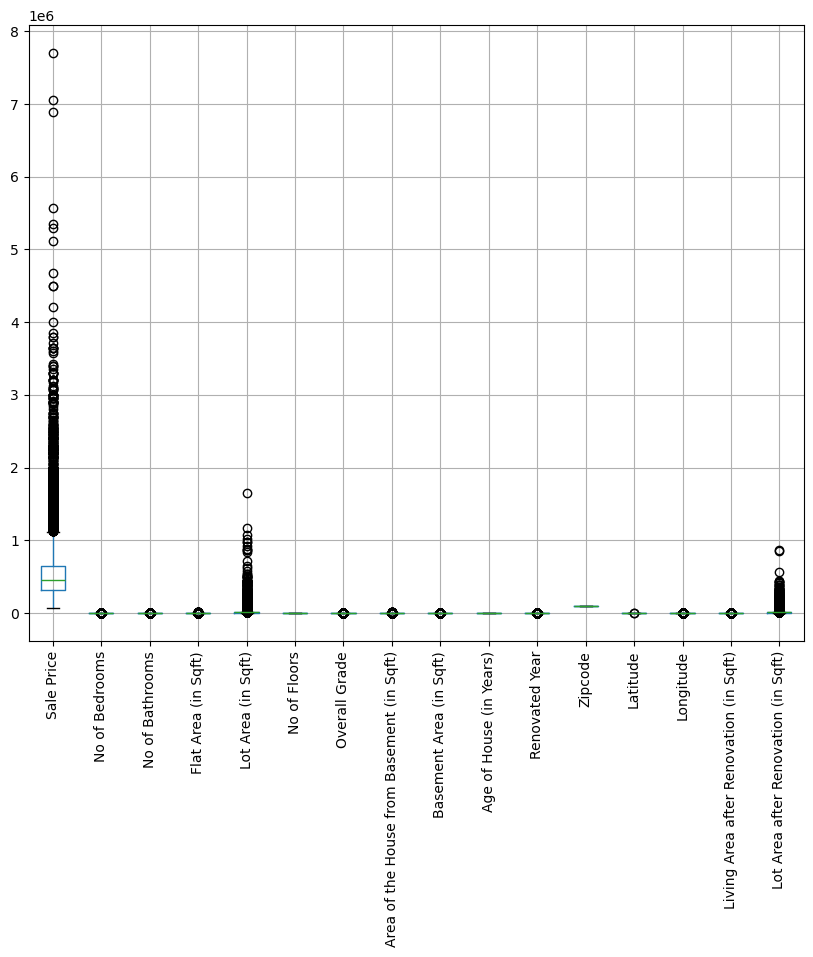

In [42]:
num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

In [43]:
num_cols = num_df.columns.tolist()
print(num_cols)

['Sale Price', 'No of Bedrooms', 'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)', 'No of Floors', 'Overall Grade', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)', 'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude', 'Longitude', 'Living Area after Renovation (in Sqft)', 'Lot Area after Renovation (in Sqft)']


In [44]:
def remove_outliers(df, column_name):
    q1 = df[column_name].quantile(0.25)
    q3 = df[column_name].quantile(0.75)
    iqr = q3- q1
    upper_bound =q3+1.5*iqr
    lower_bound =q1-1.5*iqr
    df[column_name] = df [column_name].clip(upper = upper_bound)
    df[column_name] = df [column_name].clip(lower = lower_bound)
    return df[column_name]
for col in num_cols:
    num_df[col] = remove_outliers(num_df, col)


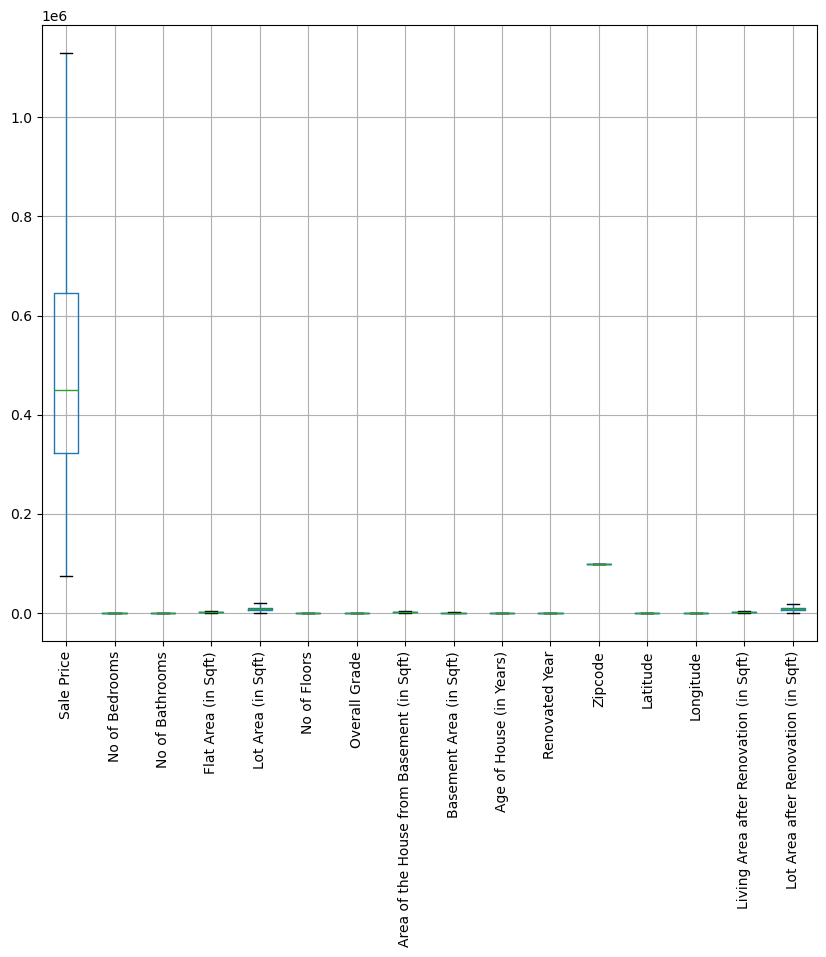

In [45]:
num_df.boxplot(figsize=(10,8))
plt.xticks(rotation = 90)
plt.show()

In [46]:
num_df.head(3)

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,7.0,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.0,7242.0,2.0,7.0,2170.0,400,67,0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.0,10000.0,1.0,6.0,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062.0


## Scaling Numerical Variables


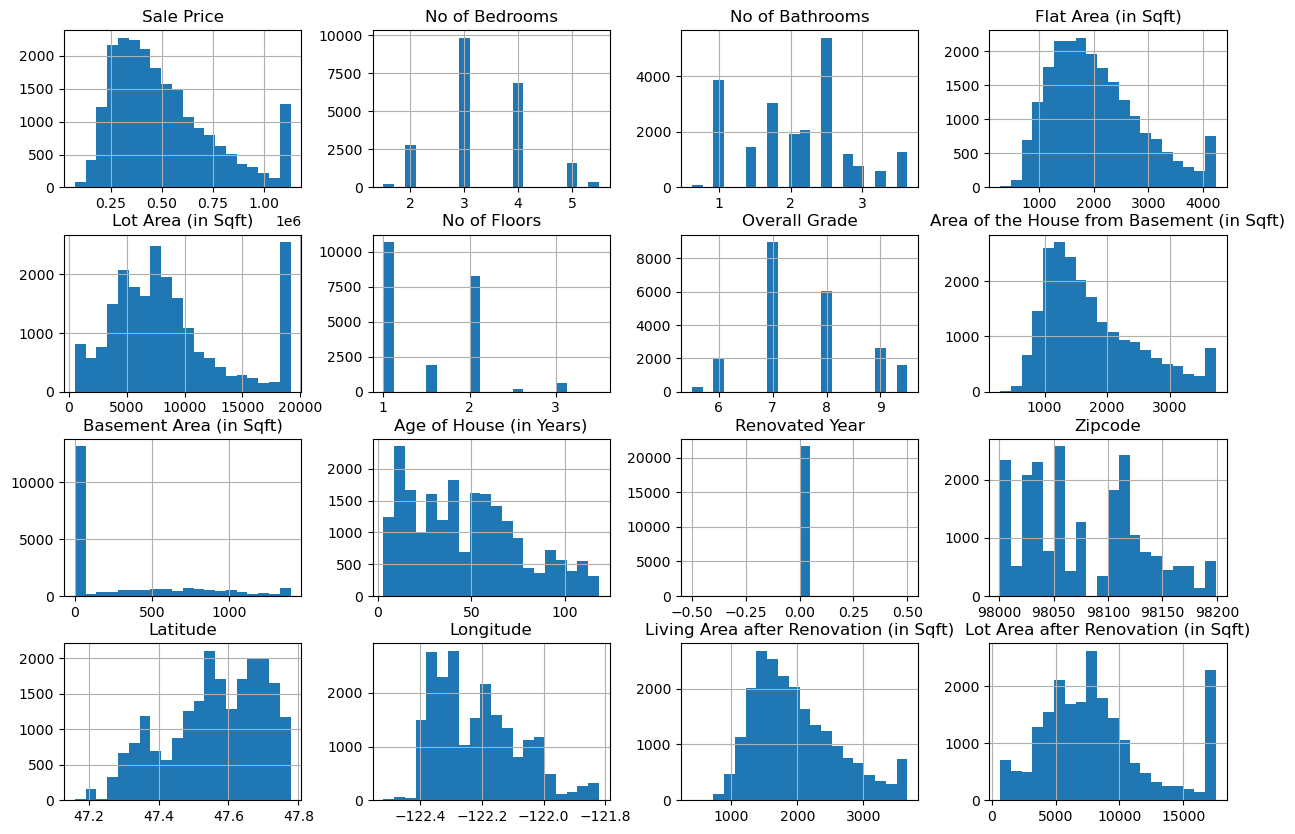

In [48]:
num_df.hist(bins=20, figsize= (15,10))
plt.show()

In [49]:
# Exclude 'Sale Price' column
data_to_scale = num_df.drop(['Sale Price'], axis=1)


In [50]:
# Identify columns to scale
right_skewed_cols = ['Lot Area (in Sqft)', 'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Age of House (in Years)',
                     'Area of the House from Basement (in Sqft)', 'Age of House (in Years)']
symmetric_cols = ['Flat Area (in Sqft)','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','Latitude']

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Shift the data to make it positive # since log transformation cannot applied in negative values.
shifted_data = num_df['Longitude'] - num_df['Longitude'].min() + 1
# Apply log transformation to handle right-skewness
num_df['Longitude'] = np.log1p(shifted_data)
# Apply log transformation for skewed columns to reduce skewness
for col in right_skewed_cols:
    data_to_scale[col] = np.log1p(data_to_scale[col])

# Apply MinMaxScaler for skewed columns
data_to_scale[right_skewed_cols] = min_max_scaler.fit_transform(data_to_scale[right_skewed_cols])

# Apply StandardScaler for symmetric columns
data_to_scale[symmetric_cols] = standard_scaler.fit_transform(data_to_scale[symmetric_cols])

# Combine the scaled data with 'Sale Price' column
data_scaled = data_to_scale.copy()
data_scaled['Sale Price'] = num_df['Sale Price']

# Display scaled data
print("Scaling complete. Scaled data:")
print(data_scaled.head())

Scaling complete. Scaled data:
   No of Bedrooms  No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  \
0             3.0             1.00            -1.046604            0.661352   
1             3.0             2.25             0.610470            0.730212   
2             2.0             1.00            -1.535382            0.819725   
3             4.0             3.00            -0.116735            0.627452   
4             3.0             2.00            -0.450534            0.760585   

   No of Floors  Overall Grade  Area of the House from Basement (in Sqft)  \
0           1.0            7.0                                   0.588053   
1           2.0            7.0                                   0.812408   
2           1.0            6.0                                   0.420598   
3           1.0            7.0                                   0.543153   
4           1.0            8.0                                   0.720123   

   Basement Area (in Sqft)  Age

In [51]:
data_scaled.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sale Price
0,3.0,1.00,-1.046604,0.661352,1.0,7.0,0.588053,0.000000,0.871644,0,98178.0,-0.352549,-122.257,-0.978599,-0.606904,221900.0
1,3.0,2.25,0.610470,0.730212,2.0,7.0,0.812408,0.827331,0.884853,0,98125.0,1.161620,-122.319,-0.439292,-0.151065,538000.0
2,2.0,1.00,-1.535382,0.819725,1.0,6.0,0.420598,0.000000,0.934609,0,98028.0,1.283591,-122.233,1.147810,-0.054122,180000.0
3,4.0,3.00,-0.116735,0.627452,1.0,7.0,0.543153,0.940593,0.833784,0,98136.0,-0.283264,-122.393,-0.947781,-0.755871,604000.0
4,3.0,2.00,-0.450534,0.760585,1.0,8.0,0.720123,0.000000,0.708519,0,98074.0,0.409588,-122.045,-0.269796,-0.182233,510000.0


In [52]:
data_scaled.shape

(21613, 16)

In [53]:
df = pd.concat([data_scaled, df_encoded], axis=1)

In [54]:
df.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Sale Price,condition_of_the_house_encoded,col_No,col_Yes
0,3.0,1.00,-1.046604,0.661352,1.0,7.0,0.588053,0.000000,0.871644,0,98178.0,-0.352549,-122.257,-0.978599,-0.606904,221900.0,3.0,1,0
1,3.0,2.25,0.610470,0.730212,2.0,7.0,0.812408,0.827331,0.884853,0,98125.0,1.161620,-122.319,-0.439292,-0.151065,538000.0,3.0,1,0
2,2.0,1.00,-1.535382,0.819725,1.0,6.0,0.420598,0.000000,0.934609,0,98028.0,1.283591,-122.233,1.147810,-0.054122,180000.0,3.0,1,0
3,4.0,3.00,-0.116735,0.627452,1.0,7.0,0.543153,0.940593,0.833784,0,98136.0,-0.283264,-122.393,-0.947781,-0.755871,604000.0,4.0,1,0
4,3.0,2.00,-0.450534,0.760585,1.0,8.0,0.720123,0.000000,0.708519,0,98074.0,0.409588,-122.045,-0.269796,-0.182233,510000.0,3.0,1,0


In [55]:
df.shape

(21613, 19)

## Train-Test Split

In [57]:
y= df['Sale Price']
X = df.drop("Sale Price",axis = 1)

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

In [59]:
X_train

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_of_the_house_encoded,col_No,col_Yes
6325,3.0,1.75,-0.331320,0.894526,1.0,9.0,0.741213,0.000000,0.737951,0,98042.0,-1.393269,-122.152,1.194036,1.099342,2.0,1,0
13473,2.0,1.00,-1.261190,0.543935,1.0,6.0,0.435964,0.732001,0.943993,0,98118.0,-0.058087,-122.290,-1.086460,-0.755871,3.0,1,0
17614,3.0,1.00,-1.165818,0.739404,1.5,6.0,0.520270,0.622622,0.911461,0,98146.0,-0.550300,-122.335,-1.240548,-0.114167,3.0,1,0
16970,3.0,2.25,0.038243,0.739922,1.0,7.0,0.618965,0.924544,0.775348,0,98031.0,-1.190466,-122.172,-0.269796,-0.217298,2.0,1,0
20868,2.0,2.50,-0.377814,0.282050,2.0,8.0,0.664735,0.785425,0.428146,0,98034.0,1.041093,-122.209,0.177058,0.494078,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,3.0,1.50,-1.261190,0.717355,1.0,7.0,0.524191,0.000000,0.897166,0,98125.0,1.113986,-122.319,-1.502497,-0.309658,3.0,1,0
21575,3.0,2.50,1.226806,0.627562,2.0,8.0,0.935163,0.000000,0.101065,0,98023.0,-1.895586,-122.349,1.466772,-0.713931,3.0,1,0
5390,3.0,2.50,0.074007,0.614970,2.0,7.0,0.804115,0.000000,0.498315,0,98053.0,0.872932,-122.032,-0.439292,-1.294445,3.0,1,0
860,1.5,0.75,-2.000316,0.932204,1.0,5.5,0.122172,0.000000,0.841996,0,98168.0,-0.570508,-122.323,-1.240548,1.535931,3.0,1,0


In [60]:
X_test

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_of_the_house_encoded,col_No,col_Yes
735,4.0,2.25,0.014400,0.787180,2.0,8.0,0.795601,0.000000,0.716283,0,98058.0,-0.875074,-122.162,0.639321,-0.137085,2.0,1,0
2830,5.0,3.00,1.003876,0.709873,1.0,8.0,0.751268,0.962927,0.775348,0,98115.0,0.854167,-122.285,0.608504,-0.461833,4.0,1,0
4106,4.0,2.50,2.041038,0.843453,2.0,9.5,1.000000,0.000000,0.609442,0,98006.0,0.032850,-122.129,2.603938,0.317838,3.0,1,0
16218,3.0,3.50,2.589422,0.924858,2.0,9.5,1.000000,0.000000,0.683319,0,98034.0,1.006450,-122.228,2.603938,1.358545,3.0,1,0
19964,3.0,2.50,0.586627,0.647563,2.0,9.0,0.869211,0.000000,0.498315,0,98052.0,0.755292,-122.083,0.423598,-0.973593,3.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13674,3.0,1.75,-0.963155,0.747582,1.0,7.0,0.609984,0.000000,0.897166,0,98155.0,1.459690,-122.317,-0.978599,-0.134793,2.0,1,0
20377,3.0,2.75,0.920427,0.528205,2.0,8.0,0.905340,0.000000,0.238184,0,98029.0,0.003981,-122.011,0.284920,-1.099413,3.0,1,0
8805,4.0,2.50,0.448339,0.591994,2.0,8.0,0.852929,0.000000,0.428146,0,98001.0,-1.967758,-122.283,0.707120,-0.893380,3.0,1,0
10168,4.0,1.75,0.228985,0.822705,1.0,8.0,0.825243,0.000000,0.825199,0,98008.0,0.232044,-122.118,0.115423,0.332735,2.0,1,0
